--------------------------
## ANOVA Analysis on Plasma Etching Process


In [1]:
## importing some depencies

import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
## Reading our Data

file_path = './files_for_lab/anova_lab_data.xlsx'
df = pd.read_excel(file_path)

# Stripping any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Extracting etching rates based on power levels
etching_rate_160W = df[df['Power'] == '160 W']['Etching Rate'].values
etching_rate_180W = df[df['Power'] == '180 W']['Etching Rate'].values
etching_rate_200W = df[df['Power'] == '200 W']['Etching Rate'].values

# Creating a new dataframe for ANOVA
df_reshaped = pd.DataFrame({
    '160 W': etching_rate_160W,
    '180 W': etching_rate_180W,
    '200 W': etching_rate_200W
})


df_reshaped

,160 W,180 W,200 W
0,5.43,6.24,8.79
1,5.71,6.71,9.20
2,6.22,5.98,7.90
3,6.01,5.66,8.15
4,5.59,6.60,7.55


---------------------------------------
- PERFORMING ANOVA

In [7]:
anova_result = stats.f_oneway(df_reshaped['160 W'], df_reshaped['180 W'], df_reshaped['200 W'])

# Degrees of Freedom
dof_model = 2
dof_error = df_reshaped.size - df_reshaped.columns.size
dof_total = dof_model + dof_error

# F-statistic and p-value
F_statistic = anova_result.statistic
p_value = anova_result.pvalue

print('ANOVA F-statistic:', F_statistic)
print('ANOVA p-value:', p_value)
print('ANOVA dof_model:', dof_model)
print('ANOVA dof_error:', dof_error)
print('ANOVA dof_total:', dof_total)

ANOVA F-statistic: 36.87895470100505
ANOVA p-value: 7.506584272358903e-06
ANOVA dof_model: 2
ANOVA dof_error: 12
ANOVA dof_total: 14


- *Visualizing Etching Rate by Power Levels*

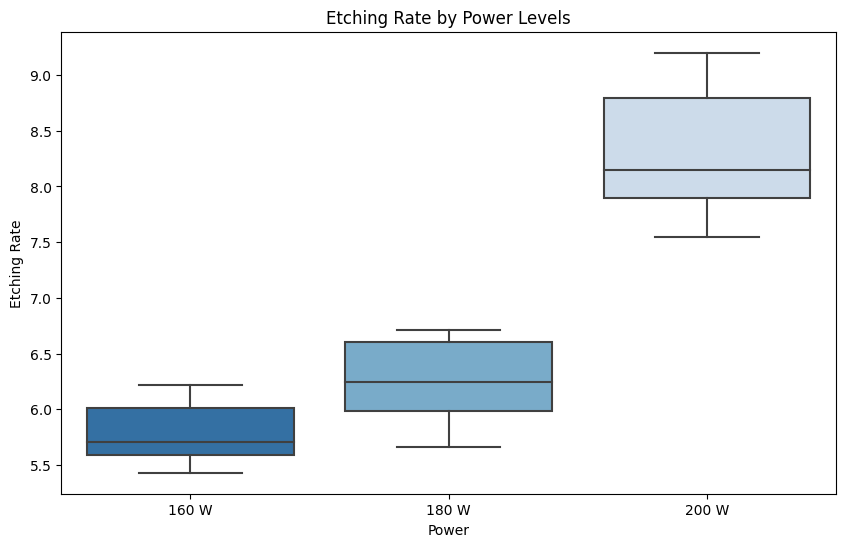

In [8]:

# Reshaping the dataframe for visualization
df_melt = df_reshaped.melt(var_name='Power', value_name='Etching Rate')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Power', y='Etching Rate', data=df_melt, palette='Blues_r')
plt.title('Etching Rate by Power Levels')
plt.show()

### Conclusions
- Rejecting the Null Hypothesis: Since the p-value is significantly less than 0.05, we reject the null hypothesis.

- Implication: There is strong evidence to suggest that there are significant differences in the mean etching rates for different power levels.

### Reasoning
- The low p-value indicates that the observed differences in the etching rates are unlikely to have occurred due to random chance alone.

- Therefore, changing the power of the plasma beam has a statistically significant effect on the etching rate.